In [166]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import readdat as rd
import ResampleUIUC as resmpl


In [168]:
import ResampleUIUC as resmpl
folder = "UIUC Database"  # UIUCのdatフォルダ
dataset, names, labels = resmpl.process_uiuc_folder(folder, n_points=200)

Saved (1635, 200, 2) to airfoils_resampled.npy
Saved (1635,) to airfoils_labels.npy


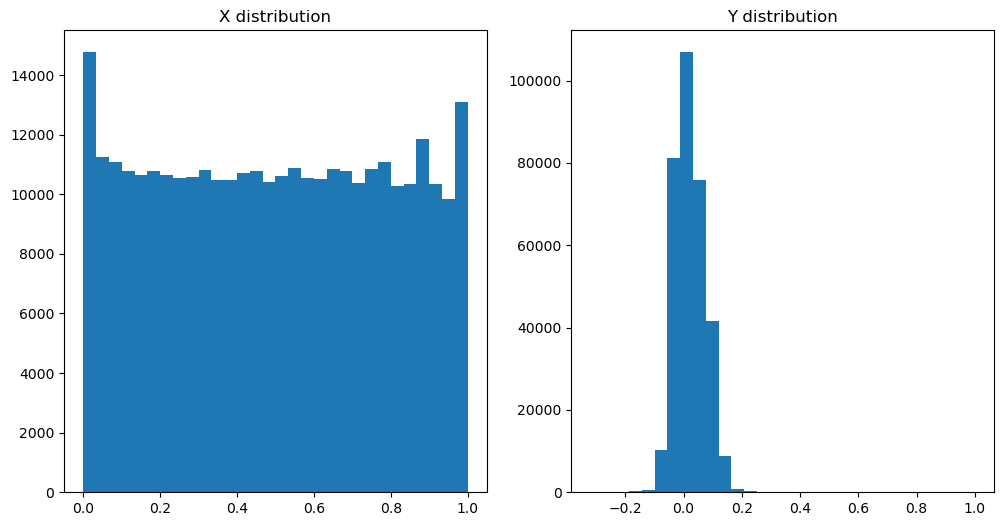

In [169]:
# dataset 1637件のx,yの分布を確認
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(dataset[:,:, 0].flatten(), bins=30)
plt.title('X distribution')

plt.subplot(1, 2, 2)
plt.hist(dataset[:,:, 1].flatten(), bins=30)
plt.title('Y distribution')
plt.show()

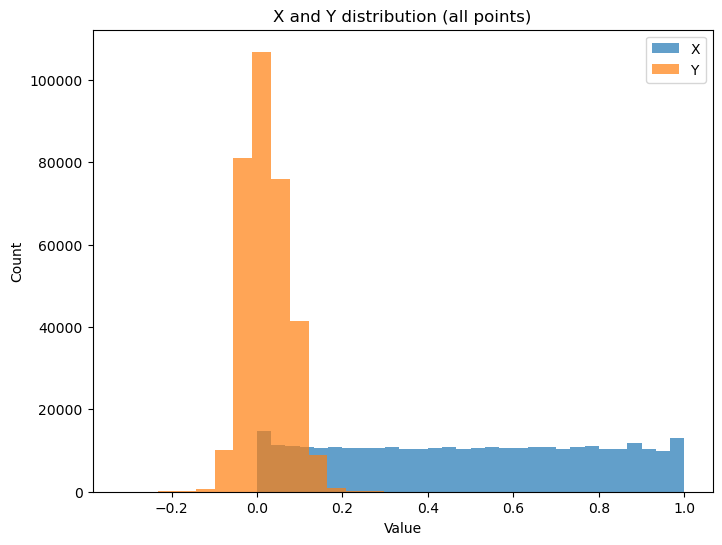

In [170]:
# dataset 1637件のx,yの分布を1つの凡例で描画
plt.figure(figsize=(8, 6))
plt.hist(dataset[:,:, 0].flatten(), bins=30, alpha=0.7, label='X')
plt.hist(dataset[:,:, 1].flatten(), bins=30, alpha=0.7, label='Y')
plt.title('X and Y distribution (all points)')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [171]:
# airfoils_labels.npy の中身を可視化
import matplotlib.pyplot as plt

airfoil_labels = np.load("airfoils_labels.npy")
print(airfoil_labels.shape)
print(airfoil_labels[:30])

(1635,)
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Drela AG' 'Drela AG' 'Drela AG'
 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG'
 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG'
 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG'
 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG' 'Drela AG']


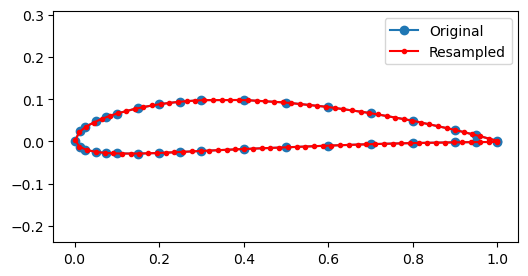

In [172]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "naca4412.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=100)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


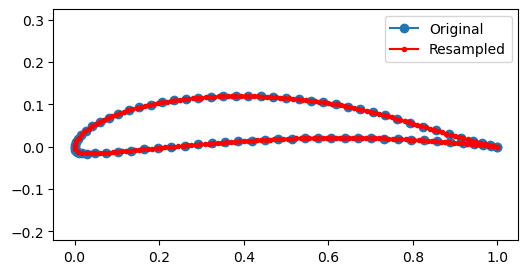

In [173]:
data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


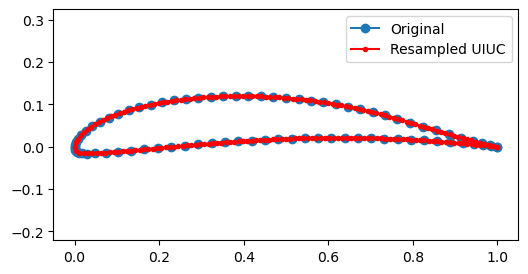

In [174]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)
coords_resampled_uiuc = resmpl.normalize_and_resample_uiuc(coords, n_points=200)


plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled_uiuc[:,0], coords_resampled_uiuc[:,1], 'r.-', label='Resampled UIUC')
plt.axis('equal')
plt.legend()
plt.show()                                  


補間点数は200あれば十分

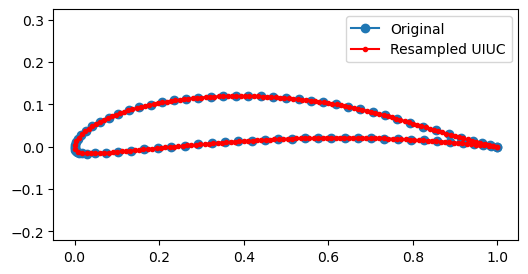

In [178]:
# resampleされたデータのアスペクト比がオリジナルと同じか確認する
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "DAE31.dat"
# filename = "naca001034.dat"
# filename = "naca001034a08cli0.2.dat"
# filename = "naca000834.dat"
# filename = "naca001035.dat"


data = data_dir + "/" + filename

# オリジナル
coords = resmpl.load_airfoil_dat(data)

# resampleされたデータ
coords_resampled_uiuc = np.load("airfoils_resampled.npy").astype("float32")  # shape: (1637, 200, 2)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled_uiuc[165][:,0], coords_resampled_uiuc[165][:,1], 'r.-', label='Resampled UIUC')
plt.axis('equal')
plt.legend()
plt.show()       

resample後のアスペクト比崩れなし。
yを再度正規化する必要はない。

In [179]:
import ResampleUIUC as resmpl
# ラベル抽出のテスト
label = resmpl.get_airfoil_label("naca4412.dat")
print(label)  # "NACA"

NACA


In [180]:

maker_list = ["NACA", "DAE", "e", "UIUC", "Boeing", "NASA", "mel", "Boeing-UIUC", "Boeing-NASA","ME"]

# ラベル抽出のテスト
for maker in maker_list:
    filename = f"{maker.lower()}_airfoil.dat"
    label = resmpl.get_airfoil_label(filename)
    print(f"Filename: {filename}, Extracted Label: {label}")

Filename: naca_airfoil.dat, Extracted Label: NACA
Filename: dae_airfoil.dat, Extracted Label: Unknown
Filename: e_airfoil.dat, Extracted Label: Eppler
Filename: uiuc_airfoil.dat, Extracted Label: Unknown
Filename: boeing_airfoil.dat, Extracted Label: Unknown
Filename: nasa_airfoil.dat, Extracted Label: Unknown
Filename: mel_airfoil.dat, Extracted Label: ME-industry
Filename: boeing-uiuc_airfoil.dat, Extracted Label: Unknown
Filename: boeing-nasa_airfoil.dat, Extracted Label: Unknown
Filename: me_airfoil.dat, Extracted Label: Unknown


# VAE

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 200, 2)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 200, 32)   │        352 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_8     │ (None, 100, 32)   │          0 │ conv1d_24[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 100, 64)   │     10,304 │ max_pooling1d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_9     │ (None, 50, 64)    │          0 │ conv1d_25[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 50, 128)   │     24,704 │ max_pooling1d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 6400)      │          0 │ conv1d_26[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │    819,328 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_4          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 855,204 (3.26 MB)

 Trainable params: 855,204 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6400)           │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 50, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_8 (UpSampling1D)  │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 100, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_9 (UpSampling1D)  │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 200, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Conv1D)         │ (None, 200, 2)         │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,842 (468.13 KB)

 Trainable params: 119,842 (468.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - kl_loss: 0.0968 - loss: 6.3046 - reconstruction_loss: 6.2078  
Epoch 2/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - kl_loss: 2.9851e-04 - loss: 0.2933 - reconstruction_loss: 0.2930
Epoch 3/3
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 3.3414e-04 - loss: 0.1280 - reconstruction_loss: 0.1276


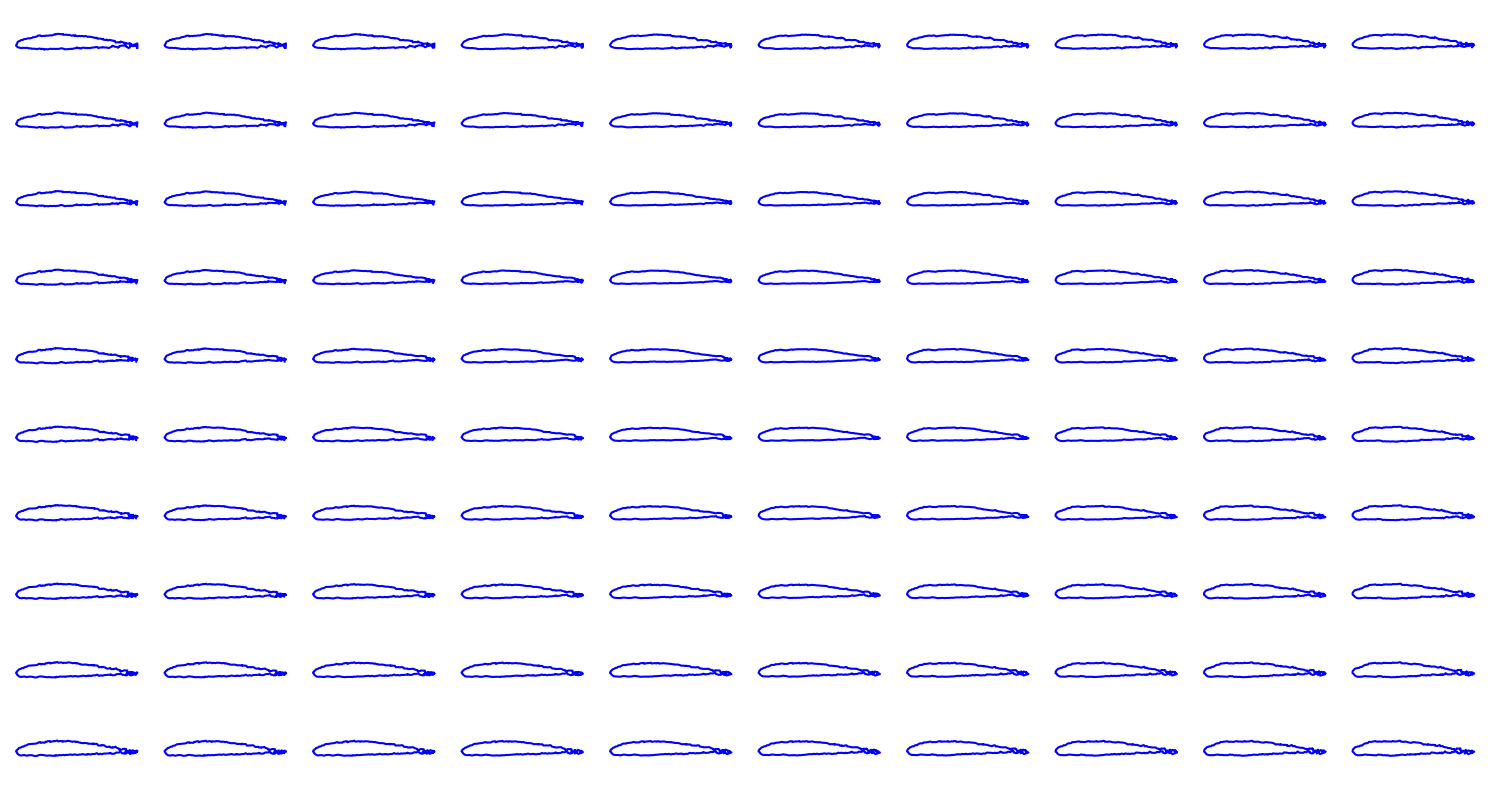

'\n「潜在空間の可視化（クラスタリングプロット）用に、airfoilとラベルを準備」\n'

In [185]:
"""
Title: Airfoil AutoEncoder
Author: tnkm23
Date created: 2025/08/12
Last modified: 2025/08/12
Description: Convolutional Variational AutoEncoder (VAE) trained on Airfoil shapes.
Accelerator: CPU

VAE
 入力：Airfoil形状データ
 出力：Airfoil形状データの再構成

"""
"""
## Setup
"""

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers


# -----------------------
# ハイパーパラメータ
# -----------------------
DATA_PATH = "airfoils_resampled.npy"
LABEL_PATH = "airfoils_labels.npy"
MODEL_DIR = "vae_models"
BATCH_SIZE = 32
EPOCHS = 3
LATENT_DIM = 2         # 潜在次元（調整する）
N_POINTS = 200
N_CHANNELS = 2         # x,y
LEARNING_RATE = 1e-3


"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z"""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        """
        reparametrization trick（再パラメータ化トリック）
        ガウシアン分布からサンプリングするためのトリック。
        z_meanとz_log_varを使って、zをサンプリングする。
        サンプリング操作を微分可能にし、VAEの学習を可能にしています。
        潜在空間の分布から「z」を生成。
        """
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""
encoder_inputs = keras.Input(shape=(N_POINTS, N_CHANNELS), name="encoder_input")
x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(encoder_inputs)
x = layers.MaxPooling1D(pool_size=2, padding="same")(x)   # 200 -> 100
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.MaxPooling1D(pool_size=2, padding="same")(x)   # 100 -> 50
x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(LATENT_DIM, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


"""
## Build the decoder
"""
latent_inputs = keras.Input(shape=(LATENT_DIM,), name="z_sampling")
x = layers.Dense(50 * 128, activation="relu")(latent_inputs)
x = layers.Reshape((50, 128))(x)  # match encoder downsampled length
x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.UpSampling1D(size=2)(x)   # 50 -> 100
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.UpSampling1D(size=2)(x)   # 100 -> 200
x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(x)
decoded_outputs = layers.Conv1D(N_CHANNELS, kernel_size=1, padding="same", activation=None, name="decoder_output")(x)
decoder = keras.Model(latent_inputs, decoded_outputs, name="decoder")
decoder.summary()


"""
## Define the VAE as a `Model` with a custom `train_step`
"""

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        """
        1. エンコーダを通してデータを潜在変数に変換
        2. デコーダを通して再構成データを生成
        3. 再構成損失とKL損失（正則化項）を計算
        4. 勾配を計算し、モデルを更新
        z_mean：潜在変数の平均 myu
        z_log_var：潜在変数の対数分散 log(var(z)) log(sigma^2)
        var_z：潜在変数の分散 var(z) sigma^2
        z：潜在変数
     """
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            
            # デコーダを通して再構成データを生成
            reconstruction = self.decoder(z)

            # 再構成損失        
            reconstruction_loss = ops.mean(
                ops.sum(
                    ops.square(data - reconstruction),
                    axis=1  # (batch, 200, 2) → sum over points/channels
                )
            )

            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var)) # KLダイバージェンス
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss # VAEの総損失

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE

- airfoils_resampled.npyを読み込み。airfoilデータは(1640,200,2)のndarray
- yチャネルのスケール正規化（必要なら）
- VAEモデルを作成・コンパイルし、全データで学習
"""

# Airfoilデータの読み込み
airfoil_data = np.load("airfoils_resampled.npy").astype("float32")  # shape: (1637, 200, 2)

# # 必要ならyチャンネルのスケール調整
# y_std = np.std(airfoil_data[:,:,1])
# if y_std > 0:
#     airfoil_data[:,:,1] = airfoil_data[:,:,1] / y_std

# # yチャンネルを各airfoilごとに[0,1]に正規化
# for i in range(airfoil_data.shape[0]):
#     y = airfoil_data[i,:,1]
#     y_min = y.min()
#     y_max = y.max()
#     if y_max > y_min:
#         airfoil_data[i,:,1] = (y - y_min) / (y_max - y_min)


# VAEモデルの作成・コンパイル
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# 学習
vae.fit(airfoil_data, epochs=EPOCHS, batch_size=BATCH_SIZE)

"""
## Display a grid of sampled airfoil
"""

import matplotlib.pyplot as plt

def plot_latent_space_airfoil(vae, n=10, figsize=(15, 8)):
    scale = 1.0
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    fig, axes = plt.subplots(n, n, figsize=figsize)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)
            ax = axes[i, j]
            ax.plot(coords_decoded[:,0], coords_decoded[:,1], 'b-')
            ax.axis('equal')
            ax.axis('off')
    plt.tight_layout()
    plt.show()


plot_latent_space_airfoil(vae)

"""
## Display how the latent space clusters different airfoil classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the airfoil latent space, colored by data index (gradient)
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    idx = np.arange(len(z_mean))
    unique_labels = np.unique(labels)
    label_colors = plt.cm.get_cmap('viridis', len(unique_labels))
    color_map = {label: label_colors(i) for i, label in enumerate(unique_labels)}
    
    plt.figure(figsize=(12, 10))
    # scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=idx, cmap='viridis')
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter, label='Data Index')
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Latent Space Clustering (Index Gradient)")
    plt.show()

"""
「潜在空間の可視化（クラスタリングプロット）用に、airfoilとラベルを準備」
"""

# airfoil_data = np.load("airfoils_resampled.npy")
# airfoil_labels = np.load("airfoils_labels.npy")
# plot_label_clusters(vae, airfoil_data, airfoil_labels)


In [183]:
from sklearn.preprocessing import LabelEncoder

# ラベルを数値に変換
def plot_label_clusters(vae, data, labels):
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    unique_labels = np.unique(labels)
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
    plt.figure(figsize=(12, 10))
    for i, label in enumerate(unique_labels):
        idx = np.where(labels == label)[0]
        plt.scatter(z_mean[idx, 0], z_mean[idx, 1],
                    color=colors[i], label=label, alpha=0.7, edgecolors='none')
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Latent Space Clustering by Label")
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

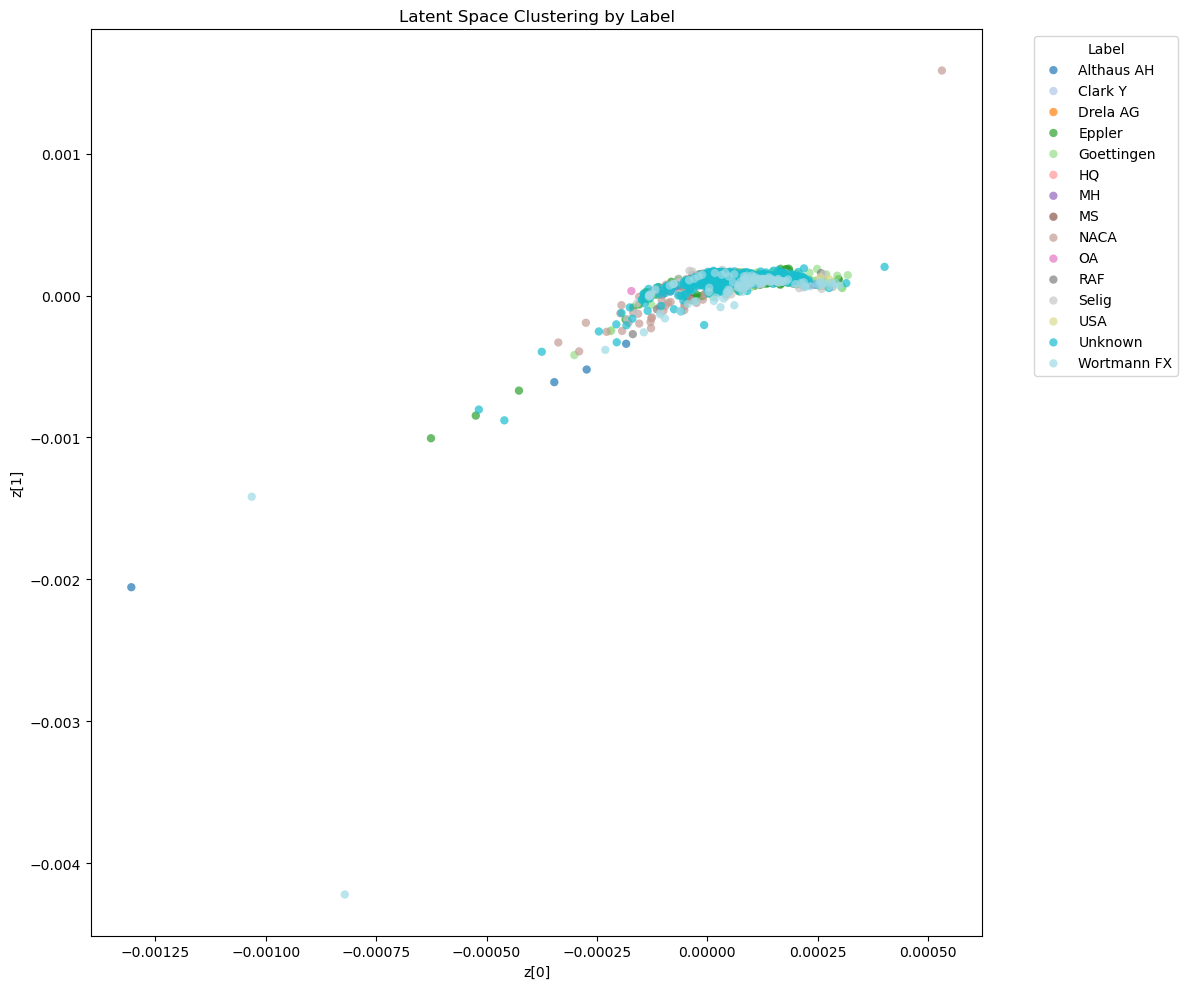

In [184]:
airfoil_data = np.load("airfoils_resampled.npy")
airfoil_labels = np.load("airfoils_labels.npy")
plot_label_clusters(vae, airfoil_data, airfoil_labels)

In [115]:
import numpy as np
import matplotlib.pyplot as plt

airfoil_data = np.load("airfoils_resampled.npy")
airfoil_labels = np.load("airfoils_labels.npy")
unique_labels = np.unique(airfoil_labels)
z_mean, _, _ = vae.encoder.predict(airfoil_data, verbose=0)

# z_mean を labels の値ごとにリストに分ける
clusters = {label: [] for label in unique_labels}
for i in range(len(airfoil_labels)):
    clusters[airfoil_labels[i]].append(z_mean[i])

clusters.keys()  # クラスタのキーを確認


dict_keys(['Althaus AH', 'Clark Y', 'Drela AG', 'Eppler', 'Goettingen', 'HQ', 'MH', 'MS', 'NACA', 'OA', 'RAF', 'Selig', 'USA', 'Unknown', 'Wortmann FX'])

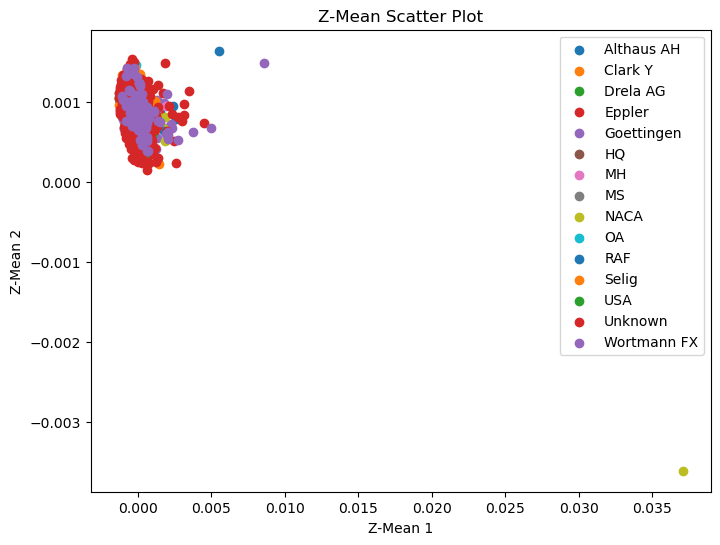

In [129]:
# 各クラスタの散布図を描画
plt.figure(figsize=(8, 6))
for cluster, points in clusters.items():
    if points:  # クラスタにポイントがある場合のみ描画
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], label=f'{cluster}')
plt.xlabel('Z-Mean 1')
plt.ylabel('Z-Mean 2')
plt.title('Z-Mean Scatter Plot')
plt.legend()
plt.show()

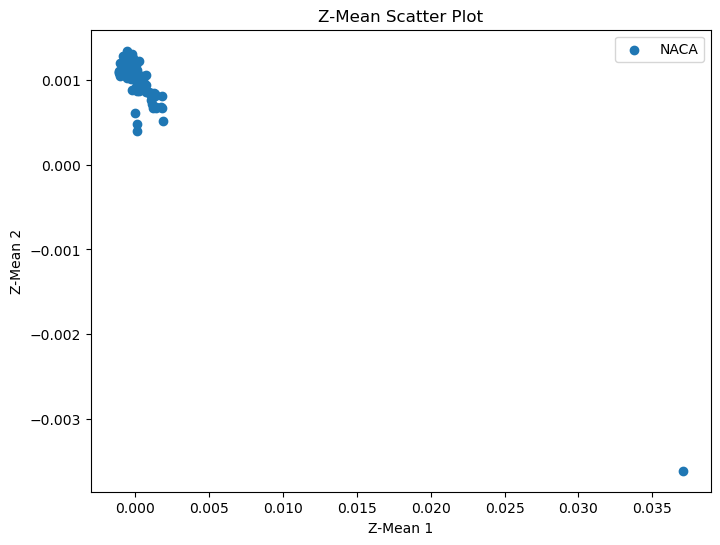

In [117]:
# 各クラスタの散布図を描画
# 描画するクラスタだけ、リストで指定
clusters_to_plot = [
                    # ' Drela AG', 
                    # 'Althaus AH',
                    # 'Clark Y',
                    # 'Eppler',
                    # 'Goettingen',
                    # 'HQ',
                    # 'MH',
                    # 'MS',
                    'NACA',
                    # 'OA',
                    # 'RAF',
                    # 'Selig',
                    # 'USA',
                    # 'Unknown',
                    # 'Wortmann FX'
                    ]


# clusters_to_plotを描画
plt.figure(figsize=(8, 6))
for cluster in clusters_to_plot:
    points = clusters.get(cluster, [])
    if points:  # クラスタにポイントがある場合のみ描画
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], label=f'{cluster}')


plt.xlabel('Z-Mean 1')
plt.ylabel('Z-Mean 2')
plt.title('Z-Mean Scatter Plot')
plt.legend()
plt.show()

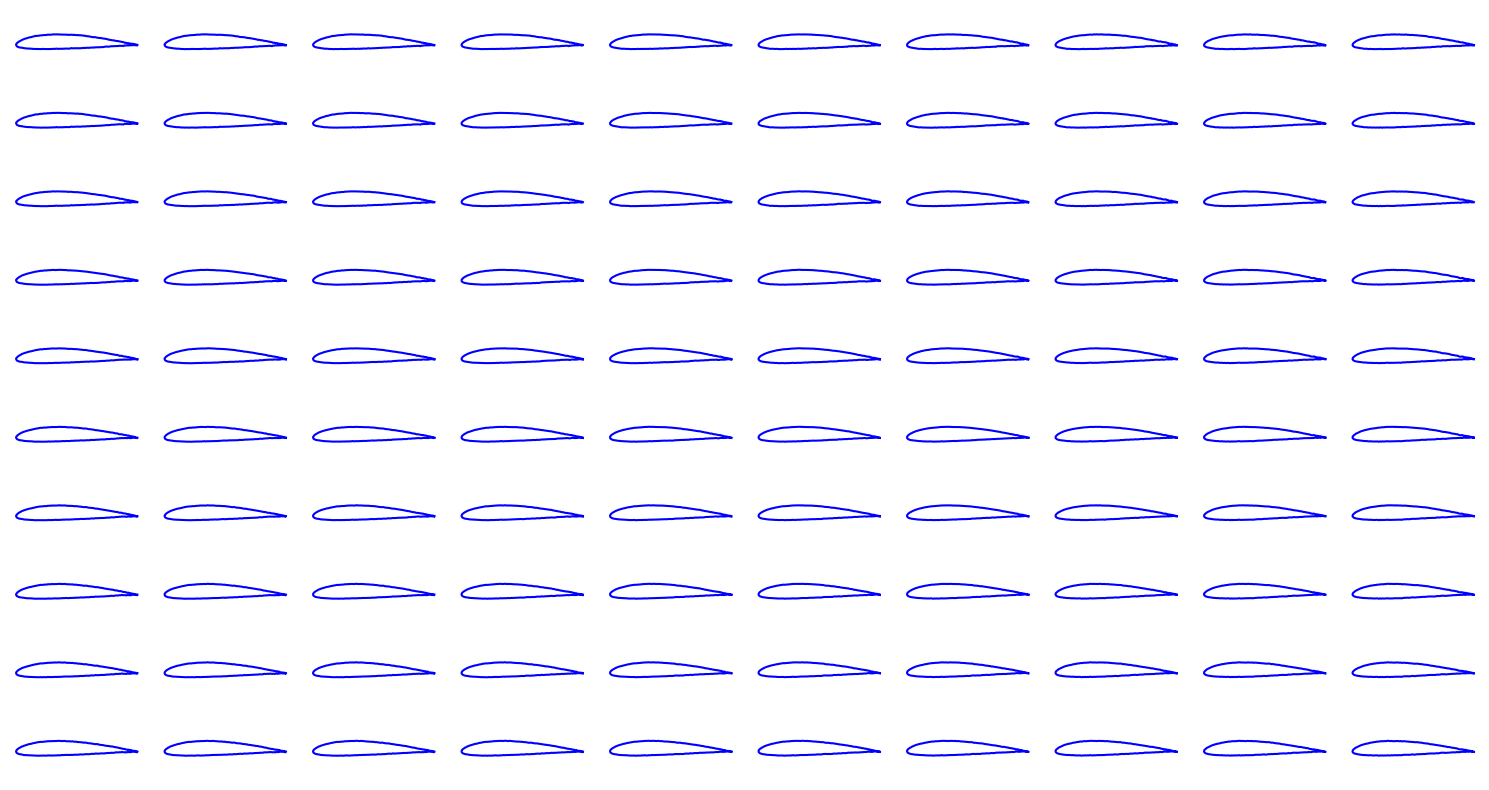

In [118]:
import matplotlib.pyplot as plt

def plot_latent_space_airfoil(vae, n=10, figsize=(15, 8)):
    scale = 1.0
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    fig, axes = plt.subplots(n, n, figsize=figsize)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)
            ax = axes[i, j]
            ax.plot(coords_decoded[:,0], coords_decoded[:,1], 'b-')
            ax.axis('equal')
            ax.axis('off')
    plt.tight_layout()
    plt.show()


plot_latent_space_airfoil(vae)

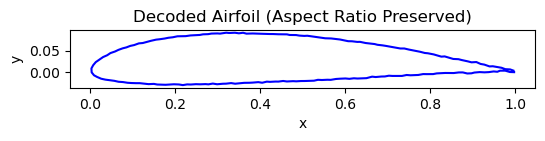

In [132]:
# VAEの潜在空間から1つだけデコードして、元のUIUC座標と同じアスペクト比で表示
import numpy as np
import matplotlib.pyplot as plt

# 任意の潜在ベクトル（例: [0,0]）
z_sample = np.array([[0, 0]])
coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)

plt.figure(figsize=(6, 3))
plt.plot(coords_decoded[:, 0], coords_decoded[:, 1], 'b-')
plt.gca().set_aspect('equal', adjustable='box')  # アスペクト比を固定
plt.title('Decoded Airfoil (Aspect Ratio Preserved)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

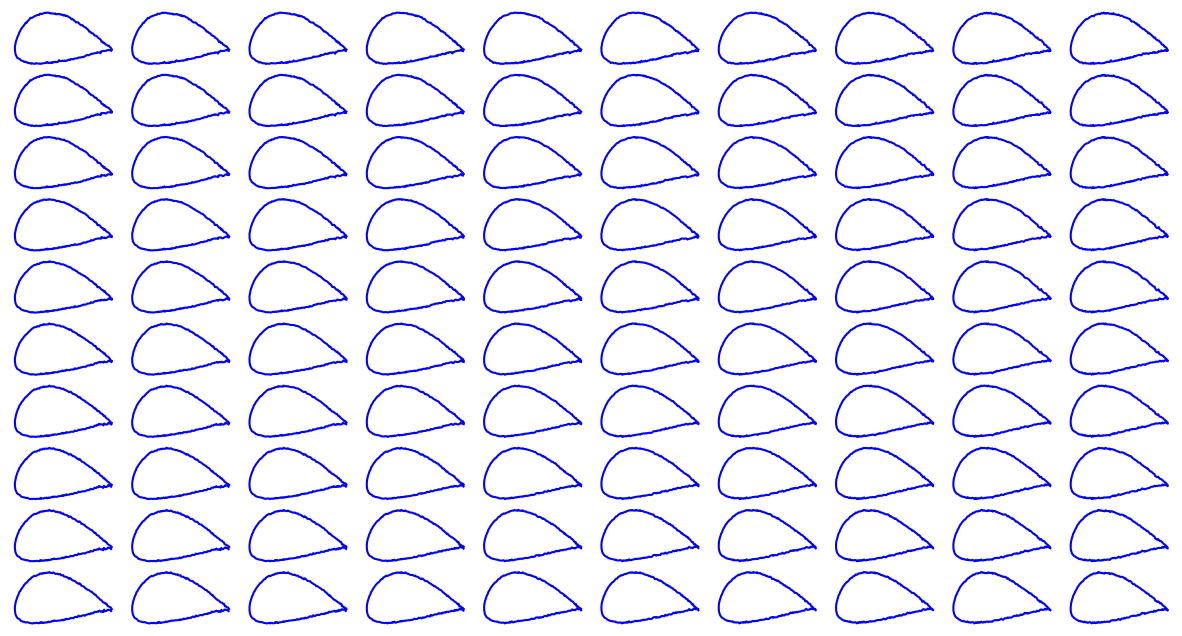

In [133]:
def plot_latent_space_airfoil(vae, n=10, figsize=(15, 8)):
    scale = 1.0
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    fig, axes = plt.subplots(n, n, figsize=figsize)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)
            ax = axes[i, j]
            ax.plot(coords_decoded[:,0], coords_decoded[:,1], 'b-')
            # ax.set_aspect('equal')  # アスペクト比を固定
            ax.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # 余白調整
    plt.show()

plot_latent_space_airfoil(vae)

In [158]:
# 各クラスタの散布図を描画
# 描画するクラスタだけ、リストで指定
clusters_to_plot = [
                    # ' Drela AG', 
                    # 'Althaus AH',
                    # 'Clark Y',
                    # 'Eppler',
                    # 'Goettingen',
                    # 'HQ',
                    # 'MH',
                    # 'MS',
                    'NACA',
                    # 'OA',
                    # 'RAF',
                    # 'Selig',
                    # 'USA',
                    # 'Unknown',
                    # 'Wortmann FX'
                    ]

# for cluster in clusters_to_plot:
#     points = clusters.get(cluster, [])
#     if points:  # クラスタにポイントがある場合のみ描画
#         points = np.array(points)
#         print(points)
#         print(f"index: {cluster}, Max {points[:, 0].max()}, min {points[:, 0].min()}")

for cluster in clusters_to_plot:
    points = clusters.get(cluster, [])
    if points:  # クラスタにポイントがある場合のみ描画
        points = np.array(points)
        # for i, point in enumerate(points):
        #     print(point[0], point[1])
    print(f"index {len(points)}")
    print(f"shape: {points.shape}")
    print(f"index: {cluster}, Max {points[:, 0].max()}, min {points[:, 0].min()}")
    print(f"index: {cluster}, Max {points[:, 1].max()}, min {points[:, 1].min()}")

    for i, point in enumerate(points):
        print(f"point {i}: {point[0]}, {point[1]}")

index 106
shape: (106, 2)
index: NACA, Max 0.037046533077955246, min -0.0011015798663720489
index: NACA, Max 0.0013444251380860806, min -0.0036095804534852505
point 0: -0.0010232519125565886, 0.0011960607953369617
point 1: -0.0008203632896766067, 0.0012849974445998669
point 2: -0.0007471259450539947, 0.0012077870778739452
point 3: -0.0005795661127194762, 0.0013444251380860806
point 4: -0.0005147404735907912, 0.0012303548865020275
point 5: -0.0005174189573153853, 0.0011112871579825878
point 6: -0.0004487469850573689, 0.0011670389212667942
point 7: -0.00048801713273860514, 0.0012789233587682247
point 8: -0.0004231765924487263, 0.0012262235395610332
point 9: -0.0003498908190522343, 0.0012212065048515797
point 10: -0.00021419711993075907, 0.0011878605000674725
point 11: -0.00016579069779254496, 0.0012618773616850376
point 12: -0.0002845529525075108, 0.001014611218124628
point 13: 0.0002784818352665752, 0.0012245741672813892
point 14: 0.0007299125427380204, 0.0010618050582706928
point 15: 0